Regresión lineal

¿Qué algoritmo vamos a usar en vez de regresión logística? ¡Así es! Regresión lineal.
La idea general de la regresión lineal es que hay una sencilla ecuación lineal que describe cómo un determinado parámetro define el output. Primero, imaginemos que la imagen de abajo nos muestra cómo se relaciona el precio con el área:

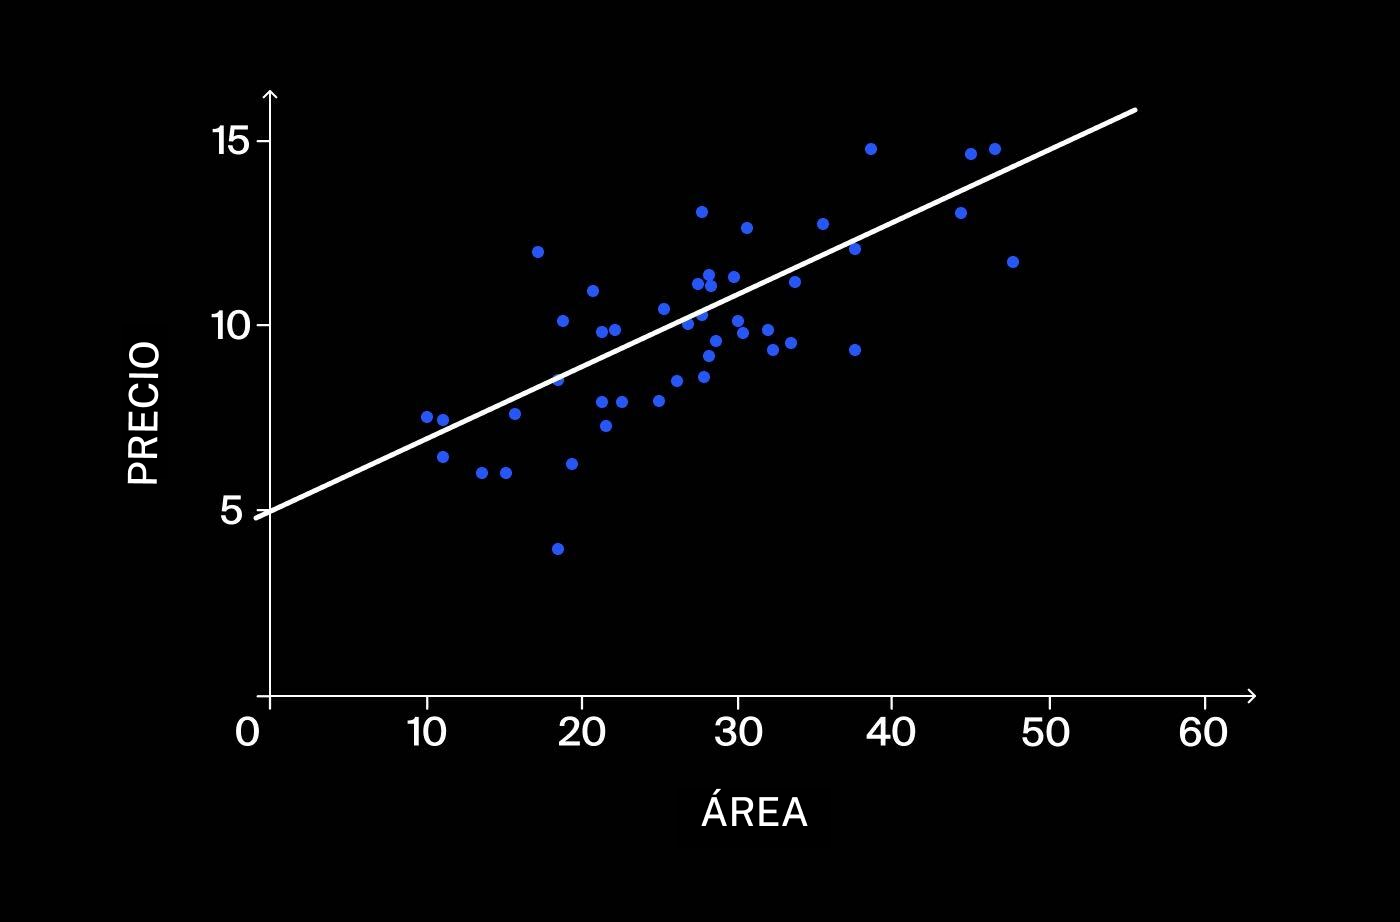



La primera línea muestra la relación aproximada entre ambos. La recta puede describirse mediante una de las ecuaciones algebraicas más sencillas: la ecuación lineal y = ax + b. Veámoslo más detenidamente:

y es el objetivo, una variable dependiente que queremos encontrar. En este caso, es el precio. x es la característica, una variable independiente que define a la dependiente. Aquí es el área. Fíjate que, a diferencia de la regresión logística, el lado derecho de la ecuación afecta directamente a la variable dependiente en vez de mediante una curva log-odds. Por eso es una línea recta.

a representa la pendiente y muestra dos cosas. En primer lugar, si es positiva el precio aumenta junto con el área; si es negativa, el precio baja conforme el área aumenta. En segundo lugar, muestra cuánto cambia el precio si el área aumenta por cada unidad. En el gráfico de arriba, el precio aumenta aproximadamente 5 unidades por cada 30 unidades del área. Eso significa que la pendiente es 5/30 o 1/6.

b se llama coeficiente lineal. Es un parámetro independiente que desplaza la línea a lo largo del eje y. Revela la cantidad fija añadida o sustraída del precio, independiente del tamaño del área. Puedes verlo en un gráfico donde el área es 0 y la línea cruza el eje y. En este caso es 5.

El algoritmo de regresión lineal determina los valores óptimos para a y b de manera que traza la línea lo más cerca posible de los puntos (para eso, minimiza el ECM). En última instancia, ajustar un modelo lineal sirve para determinar estos parámetros.

Los nombres de términos como a y b pueden variar en diferentes contextos. Sin embargo, el principio fundamental de la regresión lineal se mantiene.

Ahora vamos a usar dos características: el área y la distancia desde el centro de la ciudad. Eso significa que la regresión lineal tiene que aprender tres parámetros: dos coeficientes de pendiente y un término independiente. La ecuación se ve algo así:

precio=area*3000 d/m^2 - (distancia desde el centro de la ciudad)⋅4 dol./m+99

El modelo ha determinado que el valor del apartamento se incrementa en 3000 dólares por cada metro cuadrado adicional, mientras que disminuye en 4 dólares por cada metro alejado del centro de la ciudad. Adicionalmente, indica que, en promedio, el precio base de los apartamentos incluye un suplemento de 99 dólares. Aunque es teóricamente improbable encontrar un apartamento sin superficie y ubicado exactamente en el centro, nuestro modelo sugiere que tal apartamento tendría un costo inicial de 99 dólares.

Para representar la relación entre dos variables independientes y una dependiente necesitamos usar un espacio tridimensional. La ecuación de arriba representa un plano que divide el espacio en dos. Pero no vamos a representar eso, ni tú tampoco necesitas hacerlo. Con cada característica que añadimos las dimensiones de nuestro modelo aumentan en 1 y, de todos modos, no habrá un método directo para representar más de 3 dimensiones. Por fortuna, eso no obstaculiza la efectividad de las predicciones del modelo. Las matemáticas pueden trabajar con cualquier número de dimensiones aunque nuestro cerebro no las pueda visualizar.

La regresión lineal es un tanto rígida, no logrará ajustarse perfectamente a todos los puntos de datos. Por un lado, esto significa que algunas configuraciones de puntos podrían ser demasiado complejas para este modelo simple. Necesitaríamos usar otra cosa en estos casos. Pero, por el otro, la ventaja de la rigidez es que el sobreajuste no afecta a la regresión lineal tanto como a los árboles de decisión.

Si esta explicación de la regresión lineal suena muy sosa, ¡es porque lo es! Afortunadamente, pronto habrá un curso entero sobre ello. Por ahora, crearemos y entrenaremos un modelo de regresión lineal simple para que puedas ver cómo funciona.

Ejercicio

Lleva las características de entrenamiento a la variable features y la característica last_price del objetivo a la variable target. Divide el valor de la característica target entre 1000000.

Inicializa un modelo de regresión lineal y entrénalo. Calcula el valor de la métrica RECM en el conjunto de validación y almacénalo en la variable result.

Usa el método drop para extraer todas las características, excepto last_price.

Para calcular la métrica RECM, toma la raíz cuadrada del valor de ECM

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

df = pd.read_csv('moved_train_data_us.csv')

features = df.drop(['last_price'], axis=1)# extrae las características
target = df['last_price']/1000000# extrae los objetivos

features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345) # segmenta el 25% de los datos para hacer el conjunto de validación

model = LinearRegression()# inicializa el constructor de modelos
model.fit(features_train, target_train) # entrena el modelo en el conjunto de entrenamiento
predictions_valid = model.predict(features_valid) # obtén las predicciones del modelo en el conjunto de validación

result = mean_squared_error(target_valid, predictions_valid)**0.5# calcula la RECM en el conjunto de validación
print("RECM del modelo de regresión lineal en el conjunto de validación:", result)

RECM del modelo de regresión lineal en el conjunto de validación: 0.1545201339401726


La regresión lineal no sobreajusta. Los valores de la RECM para el conjunto de entrenamiento y para el de prueba son casi los mismos.